# Matplotlib Bible

In [40]:
%matplotlib inline

In [41]:
import matplotlib.pyplot as plt

### Basics

In [4]:
#sample data - median developer salaries by age
age = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
salary = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

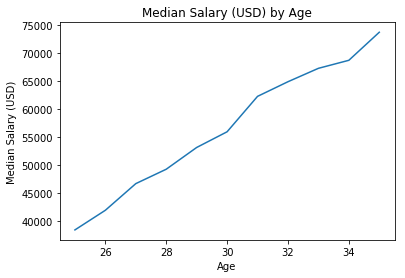

In [11]:
#plot data with labels
plt.plot(age, salary);
plt.title('Median Salary (USD) by Age');
plt.xlabel('Age');
plt.ylabel('Median Salary (USD)');

In [13]:
#add more data
py_dev_salary = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

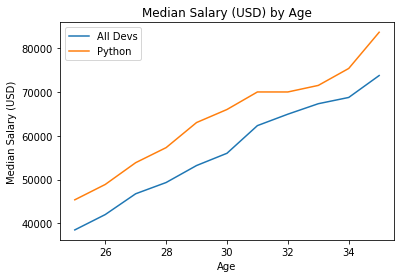

In [17]:
#plot data with labels
plt.plot(age, salary, label='All Devs');
plt.plot(age, py_dev_salary, label='Python');
plt.title('Median Salary (USD) by Age');
plt.xlabel('Age');
plt.ylabel('Median Salary (USD)');
plt.legend();

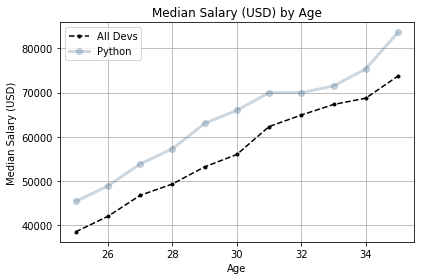

In [27]:
#[marker][line][colour][linewidth][alpha][grid]
plt.plot(age, salary, color='k', linestyle='--', marker='.', label='All Devs');
plt.plot(age, py_dev_salary, color='#5a7d9a', marker='o', linewidth=3, alpha=0.3, label='Python');
plt.title('Median Salary (USD) by Age');
plt.xlabel('Age');
plt.ylabel('Median Salary (USD)');
plt.legend();
plt.tight_layout();
plt.grid(True);

In [28]:
#plot styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

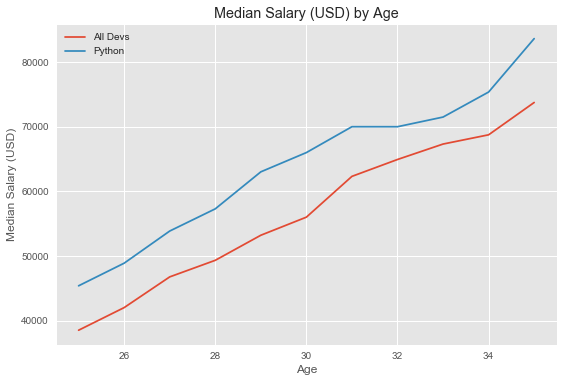

In [34]:
plt.style.use('ggplot')
plt.plot(age, salary, label='All Devs');
plt.plot(age, py_dev_salary, label='Python');
plt.title('Median Salary (USD) by Age');
plt.xlabel('Age');
plt.ylabel('Median Salary (USD)');
plt.legend();

### Bar Charts

In [3]:
import csv
import numpy as np
import pandas as pd
from collections import Counter

In [38]:
idx = np.arange(len(age))
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

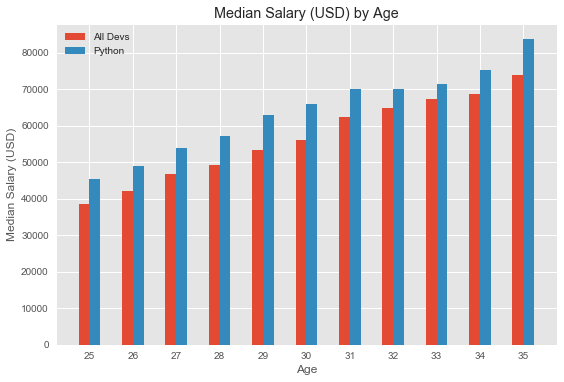

In [42]:
#need to add and subtract exactly half the width of bars
width = 0.25
plt.bar(idx - (width/2), salary, label='All Devs', width=width )
plt.bar(idx + (width/2), py_dev_salary, label='Python', width=width)
plt.title('Median Salary (USD) by Age');
plt.xlabel('Age');
plt.ylabel('Median Salary (USD)');
plt.legend();
plt.xticks(ticks=idx, labels=age);

In [46]:
#now get some data from csv
df = pd.read_csv('data.csv')
df = df.set_index(['Responder_id'])
df.head()

,LanguagesWorkedWith
Responder_id,
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS
4,C;C++;C#;Python;SQL
5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [52]:
idx = df.index
responses = df['LanguagesWorkedWith']
lang_counter = Counter()
for response in responses:
    lang_counter.update(response.split(';'))
lang_counter

Counter({'HTML/CSS': 55466,
         'Java': 35917,
         'JavaScript': 59219,
         'Python': 36443,
         'C++': 20524,
         'C': 18017,
         'C#': 27097,
         'SQL': 47544,
         'VBA': 4781,
         'R': 5048,
         'Bash/Shell/PowerShell': 31991,
         'Ruby': 7331,
         'Rust': 2794,
         'TypeScript': 18523,
         'WebAssembly': 1015,
         'Other(s):': 7920,
         'Go': 7201,
         'PHP': 23030,
         'Assembly': 5833,
         'Kotlin': 5620,
         'Swift': 5744,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})

In [84]:
lang = []
popularity = []
for item in lang_counter.most_common(15):
    lang.append(item[0])
    popularity.append(item[1])
lang.reverse()
popularity.reverse()
lang, popularity

(['Assembly',
  'Go',
  'Ruby',
  'Other(s):',
  'C',
  'TypeScript',
  'C++',
  'PHP',
  'C#',
  'Bash/Shell/PowerShell',
  'Java',
  'Python',
  'SQL',
  'HTML/CSS',
  'JavaScript'],
 [5833,
  7201,
  7331,
  7920,
  18017,
  18523,
  20524,
  23030,
  27097,
  31991,
  35917,
  36443,
  47544,
  55466,
  59219])

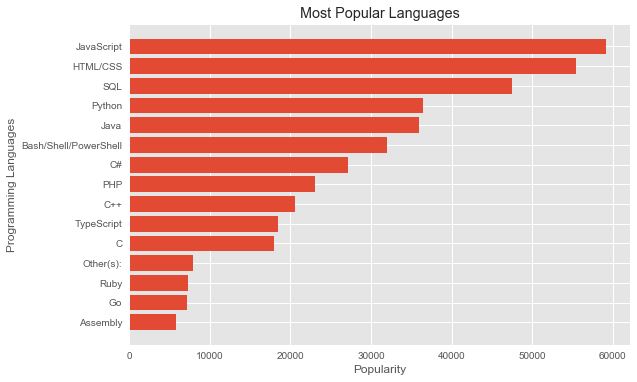

In [85]:
plt.barh(lang, popularity);
plt.title('Most Popular Languages');
plt.ylabel('Programming Languages');
plt.xlabel('Popularity');

### Pie Charts

Text(0.5, 1.0, 'Top 5 Popular Languages')

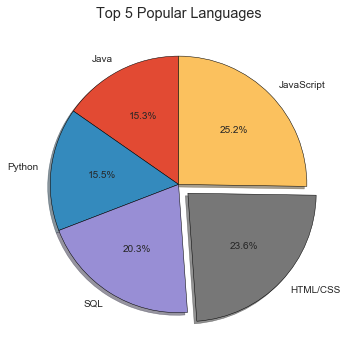

In [97]:
explode = [0, 0, 0, 0.1, 0]
plt.pie(popularity[-5:], labels=lang[-5:],
        wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True,
       startangle=90, autopct='%1.1f%%');
plt.title('Top 5 Popular Languages')

### Stack Plots

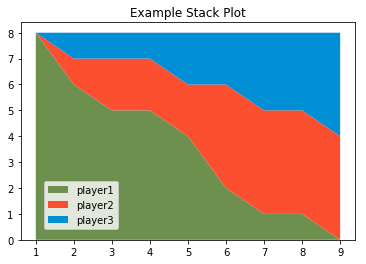

In [12]:
mins = [1, 2, 3, 4, 5, 6, 7, 8, 9]

#p1, p2, p3 could be multi-d array
p1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
p2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
p3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colours = ['#6d904f', '#fc4f30', '#008fd5']

plt.stackplot(mins, p1, p2, p3, labels=labels, colors=colours);
plt.legend(loc=(0.07, 0.05));
plt.title('Example Stack Plot');

### Areas and Line Plots

In [13]:
df = pd.read_csv('salary.csv')
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']

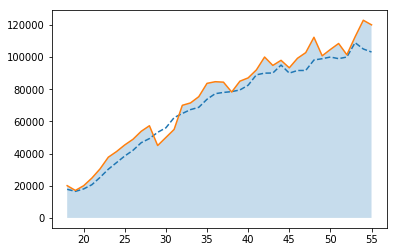

In [17]:
plt.plot(ages, dev_salaries, linestyle='--', label='All Devs');
plt.plot(ages, py_salaries, label='Python');
plt.fill_between(ages, py_salaries, alpha=0.25);

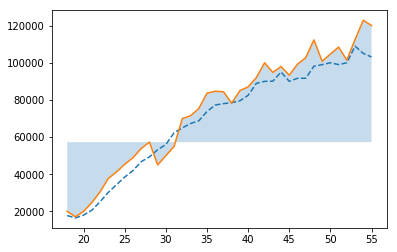

In [18]:
overall_median = 57287
plt.plot(ages, dev_salaries, linestyle='--', label='All Devs');
plt.plot(ages, py_salaries, label='Python');
plt.fill_between(ages, py_salaries, overall_median, alpha=0.25);

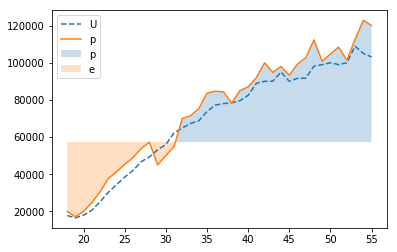

In [24]:
overall_median = 57287
plt.plot(ages, dev_salaries, linestyle='--', label='All Devs');
plt.plot(ages, py_salaries, label='Python');
plt.fill_between(ages, py_salaries, overall_median,
                 where=(py_salaries > overall_median),
                 interpolate=True,
                 label='Above Avg',
                 alpha=0.25);
plt.fill_between(ages, py_salaries, overall_median,
                 where=(py_salaries < overall_median),
                 interpolate=True,
                 label='Below Avg',
                 alpha=0.25);
plt.legend('Upper Left');

### Histograms

In [26]:
df = pd.read_csv('ages.csv')
idx = df['Responder_id']
ages = df['Age']
median_age = 29

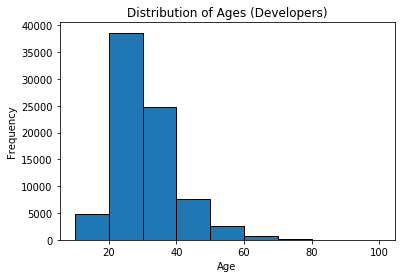

In [33]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(ages, bins=bins, edgecolor='black');
plt.title('Distribution of Ages (Developers)');
plt.ylabel('Frequency');
plt.xlabel('Age');

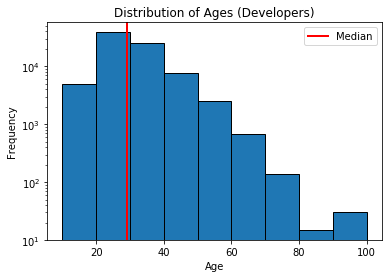

In [37]:
#plot logarithmic scale
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(ages, bins=bins, edgecolor='black', log=True);
plt.title('Distribution of Ages (Developers)');
plt.ylabel('Frequency');
plt.xlabel('Age');
plt.axvline(median_age, color='red', label='Median', linewidth=2);
plt.legend();

### Scatter Plots

In [38]:
df = pd.read_csv('scatter.csv')
view_count = df['view_count']
likes = df['likes']
ratio = df['ratio']

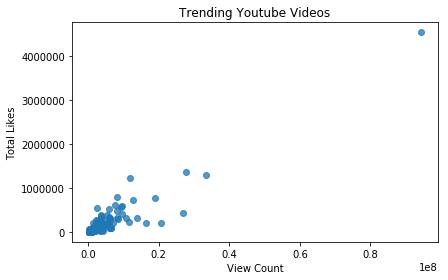

In [39]:
plt.title('Trending Youtube Videos');
plt.xlabel('View Count')
plt.ylabel('Total Likes')
plt.tight_layout();
plt.scatter(view_count, likes, linewidth=1, alpha=0.75);

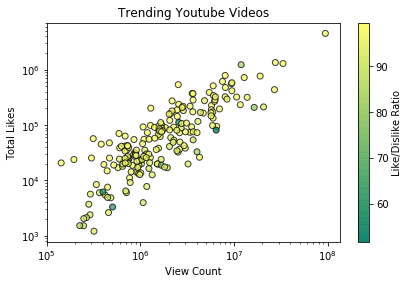

In [41]:
plt.title('Trending Youtube Videos');
plt.xlabel('View Count')
plt.ylabel('Total Likes')
plt.tight_layout();
plt.xscale('log');
plt.yscale('log');
plt.scatter(view_count, likes, edgecolor='black', 
            c=ratio, cmap='summer',
            linewidth=1, alpha=0.75);
cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio');

### Time Series Data

In [4]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

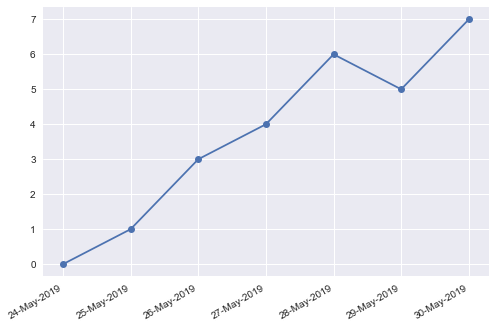

In [8]:
dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle='solid');

#to change axis need to change the figure not the plot
#.gcf method stands for get current figure

plt.gcf().autofmt_xdate();

date_format = mpl_dates.DateFormatter('%d-%b-%Y')

#get current axis method
plt.gca().xaxis.set_major_formatter(date_format);

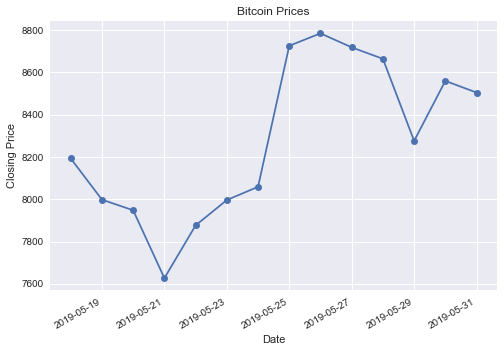

In [13]:
df = pd.read_csv('TSD.csv')
df['Date'] = pd.to_datetime(df['Date'])
p_date = df['Date']
p_close = df['Close']

plt.plot_date(p_date, p_close, linestyle='solid');

#to change axis need to change the figure not the plot
#.gcf method stands for get current figure

plt.gcf().autofmt_xdate();

plt.title('Bitcoin Prices');
plt.xlabel('Date');
plt.ylabel('Closing Price');

### Live Data - WORKS IN TERMINAL/NOT IN NOTEBOOK

In [30]:

import random
from itertools import count
from matplotlib.animation import FuncAnimation

In [ ]:
x = []
y = []

idx = count()
def animate(i):
    x.append(next(idx))
    y.append(random.randint(0, 5))
    
    #clear axis method
    plt.cla()
    plt.plot(x, y)

#interval value in ms
ani = FuncAnimation(plt.gcf(), animate, interval=1000)

### Figures and Subplots

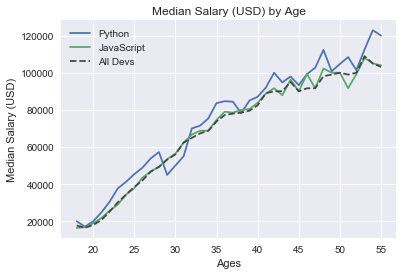

In [43]:
#better to interact with plots in Object-Oriented manner 
data = pd.read_csv('salary.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

#instantiate fig and axis using subplots method
fig, ax = plt.subplots()

ax.plot(ages, py_salaries, label='Python')
ax.plot(ages, js_salaries, label='JavaScript')

ax.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax.legend()

ax.set_title('Median Salary (USD) by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Median Salary (USD)');

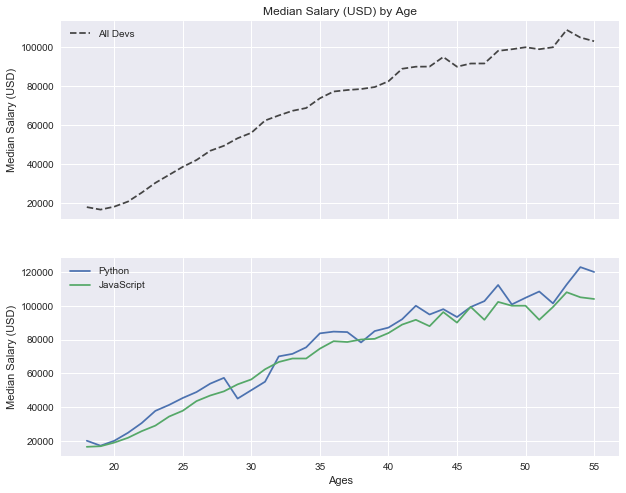

In [51]:
#multiple plots subplots(rows, columns)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,
                               figsize=(10, 8))

ax1.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')


ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)');

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)');